In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.metrics as metrics
from scipy.optimize import curve_fit
from scipy.stats import spearmanr
from sklearn.linear_model import LogisticRegressionCV

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [2]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [3]:
import jgraph as ig
from pyvis.network import Network
import networkx as nx
import plotly.graph_objects as go
from scipy.special import expit

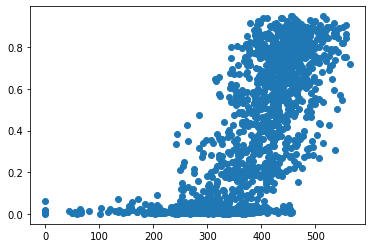

In [4]:
df_marks=pd.read_csv("~/git/huintaf2/data/Marks.csv")
df_marks["Mult"]=np.log(df_marks.NumRes+1.e-20)*df_marks.IF_plDDT
df_marks["LOG"]=np.log(df_marks.NumRes+1.e-20)
plt.scatter(df_marks.Mult,df_marks.DockQ)

In [5]:
temp=df[["Mult","DockQ"]]
spearmanr(temp)


NameError: name 'df' is not defined

In [6]:
for i in [5,6,7,8,9,10,11,12]:
    df=pd.read_csv("~/git/huintaf2/data/pdockq-marks-"+str(i)+".csv")
    df["Mult"]=np.log(df.NumRes+1.e-20)*df.IF_plDDT
    df["LOG"]=np.log(df.NumRes+1.e-20)
    #print (df,df_marks)
    df_merge=pd.merge(df,df_marks,on="Name")
    #print (df_merge)
    temp=df_merge[["Mult_x","DockQ"]]
    #print(temp)
    print (i,spearmanr(temp))
    Y=df_merge["DockQ"].to_list()
    X=df_merge["Mult_x"].to_list()
    p0 = [max(Y), np.median(X),1,min(Y)] # this is a mandatory initial guess
    sigmoid(1,p0[0],p0[1],p0[2],p0[3])
    popt, pcov = curve_fit(sigmoid, X, Y,p0, method='dogbox')
    pred=sigmoid(X,*popt)
    print (popt)
    print (np.corrcoef(pred,Y)[0,1])
    plt.scatter(Y,pred,label=i)
    plt.xlabel("DockQ")
    plt.ylabel("pDockQ")
    plt.title("DockQ vs pDockQ for cutoff="+str(i))
    plt.show()

5 SpearmanrResult(correlation=0.7647585237390458, pvalue=4.749030057232305e-280)


NameError: name 'sigmoid' is not defined

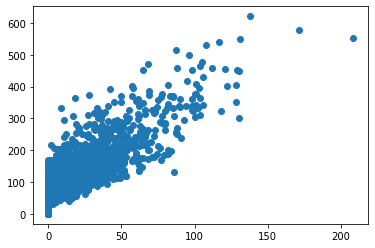

In [7]:
df5=pd.read_csv("~/git/huintaf2/data/pdockq-marks-5.csv")
df12=pd.read_csv("~/git/huintaf2/data/pdockq-marks-12.csv")

df_merge=pd.merge(df5,df12,on="Name")
plt.scatter(df_merge.NumRes_x,df_merge.NumRes_y)
#df_merge.keys()

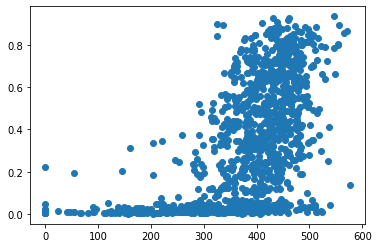

In [7]:
df=pd.read_csv("~/git/huintaf2/data/humap.csv")
df2=pd.read_csv("~/git/huintaf2/data/DockQall.csv",names=["Name","DockQ"])
df=pd.merge(df,df2,on="Name")
df["Mult"]=np.log(df.NumRes+1.e-20)*df.IF_plDDT
df["LOG"]=np.log(df.NumRes+1.e-20)
plt.scatter(df.Mult,df.DockQ)

In [8]:
df_marks

Unnamed: 0           Name     id1     id2  NumRes   IF_plDDT      plDDT  \
0              0  1A0R_B-1A0R_G  1A0R_B  1A0R_G     235  93.899142  95.313932   
1              1  1A0R_B-1A0R_P  1A0R_B  1A0R_P     132  80.132274  88.105953   
2              2  1AWC_A-1AWC_B  1AWC_A  1AWC_B     101  94.621246  95.528290   
3              3  1B33_E-1B33_N  1B33_E  1B33_N      96  83.564738  88.665342   
4              4  1BH9_A-1BH9_B  1BH9_A  1BH9_B     123  96.154666  95.329663   
...          ...            ...     ...     ...     ...        ...        ...   
1452        1452  5XBF_A-5XBF_B  5XBF_A  5XBF_B     122  73.466014  90.907866   
1453        1453  5XEQ_A-5XEQ_B  5XEQ_A  5XEQ_B     264  81.721855  88.738221   
1454        1454  5XJL_2-5XJL_M  5XJL_2  5XJL_M      67  82.633918  77.886300   
1455        1455  5XJL_A-5XJL_2  5XJL_A  5XJL_2      19  83.566346  84.026528   
1456        1456  5XSJ_L-5XSJ_X  5XSJ_L  5XSJ_X      51  85.587649  93.687811   

      Overlap  DockQ    pDockQ        Mult       LOG  
0           0  0.822  0.724723  512.650397  5.459586  
1           0  0.120  0.402724  391.270024  4.882802  
2           0  0.850  0.612654  436.688454  4.615121  
3           0  0.030  0.348053  381.418562  4.564348  
4           0  0.920  0.676879  462.713978  4.812184  
...       ...    ...       ...         ...       ...  
1452        0  0.111  0.207156  352.932277  4.804021  
1453        0  0.009  0.663235  455.676902  5.575949  
1454        0  0.250  0.185358  347.450226  4.204693  
1455        0  0.019  0.039322  246.056005  2.944439  
1456        0  0.015  0.147896  336.515712  3.931826  

[1457 rows x 12 columns]

Empty DataFrame
Columns: [Name, pDockQ, NumRes, IF_plDDT, plDDT1, plDDT2, NumDiso1+90, NumDiso1-70-90, NumDiso1-50-70, NumDiso1-50, NumDiso2+90, NumDiso2-70-90, NumDiso2-50-70, NumDiso2-50, NumOverlap, len1, len2, DockQ, Mult, LOG]
Index: []

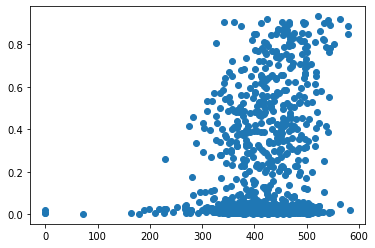

In [9]:
df_multi=pd.read_csv("~/git/huintaf2/data/AFmulti-humap.csv")
df2_multi=pd.read_csv("~/git/huintaf2/data/AFmulti-DockQall.csv",names=["Name","DockQ"])
df_multi=pd.merge(df_multi,df2_multi,on="Name")
df_multi["Mult"]=np.log(df_multi.NumRes+1)*df_multi.IF_plDDT
df_multi["LOG"]=np.log(df_multi.NumRes+1)

plt.scatter(df_multi.Mult,df_multi.DockQ)
df_multi[df_multi.Mult<0]

Empty DataFrame
Columns: [Name, pDockQ, NumRes, IF_plDDT, plDDT1, plDDT2, NumDiso1+90, NumDiso1-70-90, NumDiso1-50-70, NumDiso1-50, NumDiso2+90, NumDiso2-70-90, NumDiso2-50-70, NumDiso2-50, NumOverlap, len1, len2, DockQ, Mult, LOG]
Index: []

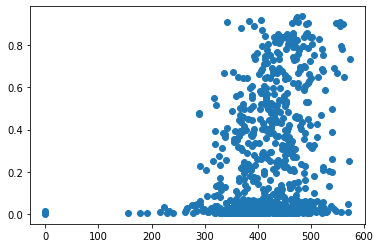

In [10]:
df_multi2=pd.read_csv("~/git/huintaf2/data/AF-MULTI2-humap.csv")
df2_multi2=pd.read_csv("~/git/huintaf2/data/AF-MULTI2-DockQall.csv",names=["Name","DockQ"])
df_multi2=pd.merge(df_multi2,df2_multi2,on="Name")
df_multi2["Mult"]=np.log(df_multi2.NumRes+1)*df_multi2.IF_plDDT
df_multi2["LOG"]=np.log(df_multi2.NumRes+1)


plt.scatter(df_multi2.Mult,df_multi2.DockQ)
df_multi2[df_multi2.Mult<0]

Empty DataFrame
Columns: [Name, pDockQ, NumRes, IF_plDDT, plDDT1, plDDT2, NumDiso1+90, NumDiso1-70-90, NumDiso1-50-70, NumDiso1-50, NumDiso2+90, NumDiso2-70-90, NumDiso2-50-70, NumDiso2-50, NumOverlap, len1, len2, DockQ, Mult, LOG]
Index: []

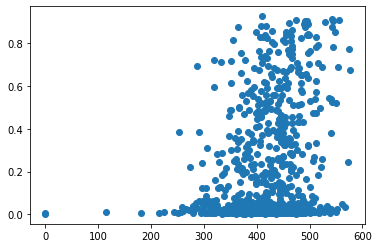

In [11]:
df_multi3=pd.read_csv("~/git/huintaf2/data/AF-MULTI3-humap.csv")
df2_multi3=pd.read_csv("~/git/huintaf2/data/AF-MULTI3-DockQall.csv",names=["Name","DockQ"])
df_multi3=pd.merge(df_multi3,df2_multi3,on="Name")
df_multi3["Mult"]=np.log(df_multi3.NumRes+1)*df_multi3.IF_plDDT
df_multi3["LOG"]=np.log(df_multi3.NumRes+1)


plt.scatter(df_multi3.Mult,df_multi3.DockQ)
df_multi3[df_multi3.Mult<0]

Empty DataFrame
Columns: [Name, pDockQ, NumRes, IF_plDDT, plDDT1, plDDT2, NumDiso1+90, NumDiso1-70-90, NumDiso1-50-70, NumDiso1-50, NumDiso2+90, NumDiso2-70-90, NumDiso2-50-70, NumDiso2-50, NumOverlap, len1, len2, DockQ, Mult, LOG]
Index: []

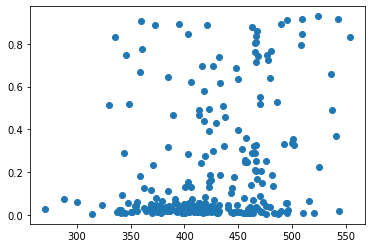

In [12]:
df_multi4=pd.read_csv("~/git/huintaf2/data/AF-MULTI4-humap.csv")
df2_multi4=pd.read_csv("~/git/huintaf2/data/AF-MULTI4-DockQall.csv",names=["Name","DockQ"])
df_multi4=pd.merge(df_multi4,df2_multi4,on="Name")
df_multi4["Mult"]=np.log(df_multi4.NumRes+1)*df_multi4.IF_plDDT
df_multi4["LOG"]=np.log(df_multi4.NumRes+1)


plt.scatter(df_multi4.Mult,df_multi4.DockQ)
df_multi4[df_multi4.Mult<0]

Empty DataFrame
Columns: [Name, pDockQ, NumRes, IF_plDDT, plDDT1, plDDT2, NumDiso1+90, NumDiso1-70-90, NumDiso1-50-70, NumDiso1-50, NumDiso2+90, NumDiso2-70-90, NumDiso2-50-70, NumDiso2-50, NumOverlap, len1, len2, DockQ, Mult, LOG]
Index: []

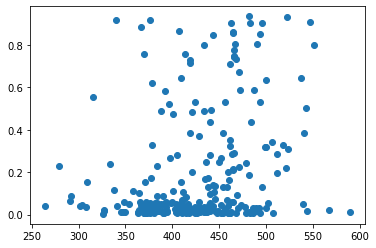

In [15]:
df_multir10=pd.read_csv("~/git/huintaf2/data/AF-MULTI-rec10-humap.csv")
df2_multir10=pd.read_csv("~/git/huintaf2/data/AF-MULTI-rec10-DockQall.csv",names=["Name","DockQ"])
df_multir10=pd.merge(df_multir10,df2_multir10,on="Name")
df_multir10["Mult"]=np.log(df_multir10.NumRes+1)*df_multir10.IF_plDDT
df_multir10["LOG"]=np.log(df_multir10.NumRes+1)


plt.scatter(df_multir10.Mult,df_multir10.DockQ)
df_multir10[df_multir10.Mult<0]

In [17]:
print("df",np.mean(df.DockQ),len(df[df.DockQ>0.23])/len(df))
print("df1",np.mean(df_multi.DockQ),len(df_multi[df_multi.DockQ>0.23])/len(df_multi))
print("df2",np.mean(df_multi2.DockQ),len(df_multi2[df_multi2.DockQ>0.23])/len(df_multi2))
print("df3",np.mean(df_multi3.DockQ),len(df_multi3[df_multi3.DockQ>0.23])/len(df_multi3))
print("dfr4",np.mean(df_multi4.DockQ),len(df_multi4[df_multi4.DockQ>0.23])/len(df_multi4))
print("dfr10",np.mean(df_multir10.DockQ),len(df_multir10[df_multir10.DockQ>0.23])/len(df_multir10))



df 0.3208139931740614 0.5426621160409556
df1 0.21569601677148847 0.35744234800838576
df2 0.1969081527347781 0.3157894736842105
df3 0.1894836527621195 0.30101465614430667
df4 0.20800000000000002 0.30739299610894943


In [11]:
df_multi2["NumDiso"]=df_multi2["NumDiso1-50"]+df_multi2["NumDiso1-50"]
df_multi2

Name    pDockQ  NumRes   IF_plDDT     plDDT1     plDDT2  \
0    O00231-O00232  0.519469     155  81.993613  89.289171  91.924539   
1    O00231-O00487  0.124894     252  59.376667  86.059716  61.033290   
2    O00232-O00231  0.031322       0   0.000000  92.513728  90.591250   
3    O00232-O00487  0.307574     208  70.058558  90.856886  65.521323   
4    O00303-O15372  0.528360     536  66.105989  66.887227  69.845256   
..             ...       ...     ...        ...        ...        ...   
826  Q92905-Q9BT78  0.113643     223  59.859776  65.411497  89.230443   
827  Q92905-Q9H9Q2  0.613495     448  71.574487  68.943263  79.606288   
828  Q92905-Q9UBW8  0.503090     447  67.210000  66.918713  77.020691   
829  Q92905-Q9UNS2  0.320154     332  64.821265  66.477814  85.008463   
830  Q93050-P61421  0.147349     122  70.011475  72.652330  78.843846   

     NumDiso1+90  NumDiso1-70-90  NumDiso1-50-70  NumDiso1-50  ...  \
0            298             100              20            4  ...   
1            209             173              32            8  ...   
2            387              59               6            4  ...   
3            371              50              31            4  ...   
4            105              74              80           98  ...   
..           ...             ...             ...          ...  ...   
826           47             110              59          118  ...   
827           62              97              96           79  ...   
828           50             108              76          100  ...   
829           57             102              56          119  ...   
830            3             581             173           80  ...   

     NumDiso2-70-90  NumDiso2-50-70  NumDiso2-50  NumOverlap  len1  len2  \
0                59              11            4           4   422   456   
1               108              51          136          49   422   310   
2                 9               0            0           0   456    32   
3                92             111           72          53   456   310   
4               116              80           77          65   357   352   
..              ...             ...          ...         ...   ...   ...   
826              40              25           18          42   334   406   
827              95              14           35         104   334   264   
828              96              14           51         100   334   275   
829              85              30           33          39   334   423   
830             291              44           10           4   837   351   

     DockQ        Mult       LOG  NumDiso  
0    0.004  414.055939  5.049856        8  
1    0.171  328.554225  5.533389       16  
2    0.000    0.000000  0.000000        8  
3    0.013  374.276234  5.342334        8  
4    0.535  415.542121  6.285998      196  
..     ...         ...       ...      ...  
826  0.037  323.939920  5.411646      236  
827  0.023  437.107030  6.107023      158  
828  0.020  410.303153  6.104793      200  
829  0.012  376.491144  5.808142      238  
830  0.003  336.908125  4.812184      160  

[831 rows x 21 columns]

Text(0.5, 1.0, 'Number of Disorder vs DockQ')

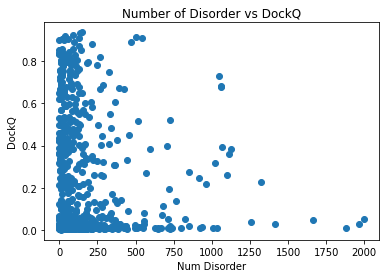

In [12]:
plt.scatter(df_multi2.NumDiso,df_multi2.DockQ)
plt.xlabel("Num Disorder")
plt.ylabel("DockQ")
plt.title("Number of Disorder vs DockQ")

Name  pDockQ_x  NumRes_x  IF_plDDT_x   plDDT1_x   plDDT2_x  \
0    O00716-Q5H9I0  0.394736       682   59.744135  55.194344  62.656667   
1    O14531-Q9BPU6  0.698713       476   77.477332  86.152360  86.756454   
2    O15145-P61160  0.535805       103   89.980971  90.462921  93.475355   
3    O43482-Q9NYP9  0.547993       352   71.588097  70.763275  74.415579   
4    O43617-Q8IUR0  0.656201       189   86.322646  89.822111  84.323351   
..             ...       ...       ...         ...        ...        ...   
210  Q9Y4Z0-P62310  0.228774       123   74.381138  67.395827  78.601471   
211  Q9Y4Z0-Q9Y333  0.388165        96   85.149271  64.521223  77.298737   
212  Q9Y5R8-Q8IUR0  0.249663       152   72.147434  84.080069  72.960638   
213  Q9Y6G5-Q9H0A8  0.458688       238   73.373992  77.510941  80.658241   
214  Q9Y6G5-Q9NX08  0.217095       197   67.246904  76.721436  70.850219   

     NumDiso1+90_x  NumDiso1-70-90_x  NumDiso1-50-70_x  NumDiso1-50_x  ...  \
0               14               151                25            275  ...   
1              447                44                 2             79  ...   
2              130                43                 5              0  ...   
3               70                73                15             71  ...   
4              142                20                 6             12  ...   
..             ...               ...               ...            ...  ...   
210             39                42                 8             50  ...   
211             15                62                 8             54  ...   
212             58                72                14              1  ...   
213             55                93                40             14  ...   
214             39               105                41             17  ...   

     NumDiso2-70-90_y  NumDiso2-50-70_y  NumDiso2-50_y  NumOverlap_y  len1_y  \
0                 207                16            171            90     465   
1                  29                 6             69            43     572   
2                  26                11              4            22     178   
3                  72                43             31            11     229   
4                  26                23             14             4     180   
..                ...               ...            ...           ...     ...   
210                21                 5             14             2     139   
211                60                35              0             5     139   
212                61                26             40            31     145   
213               120                32             11             7     202   
214                88                64             31            60     202   

     len2_y  DockQ_y      Mult_y     LOG_y  dDockQ  
0       405    0.015  393.157885  6.444131   0.001  
1       564    0.008  495.637303  6.167516   0.001  
2       394    0.061  473.200217  5.192957  -0.002  
3       233    0.687  447.936856  5.717028   0.002  
4       188    0.070  463.239016  5.257495   0.001  
..      ...      ...         ...       ...     ...  
210     102    0.034  421.622368  4.753590   0.018  
211      95    0.020  383.886668  4.564348   0.019  
212     188    0.051  369.276339  5.241747  -0.025  
213     199    0.153  403.505930  5.590987  -0.003  
214     183    0.317  384.499750  5.723585  -0.016  

[215 rows x 40 columns]

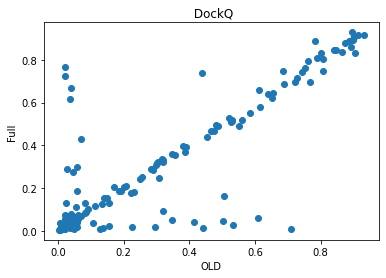

In [16]:
df_merge=pd.merge(df_multi,df_multi4,on="Name")
df_merge["dDockQ"]=df_merge.DockQ_x-df_merge.DockQ_y
plt.scatter(df_merge.DockQ_x,df_merge.DockQ_y)
plt.xlabel("OLD")
plt.ylabel("Full")
plt.title(" DockQ")
df_merge

Text(0.5, 1.0, 'Number of Disorder vs DockQ')

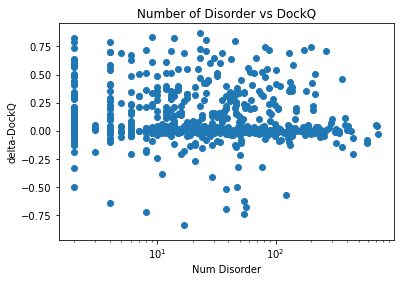

In [30]:

plt.scatter(df_merge.NumOverlap_y,df_merge.dDockQ)
plt.xlabel("Num Disorder")
plt.xscale('log')
plt.ylabel("delta-DockQ")
plt.title("Number of Disorder vs DockQ")

Text(0.5, 1.0, 'Number of Disorder vs DockQ')

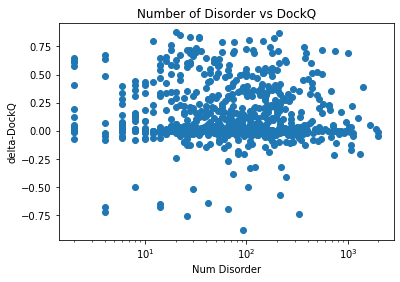

In [28]:

plt.scatter(df_merge.NumDiso,df_merge.dDockQ)
plt.xlabel("Num Disorder")
plt.xscale('log')
plt.ylabel("delta-DockQ")
plt.title("Number of Disorder vs DockQ")

Text(0.5, 1.0, 'Number of Overlap vs DockQ')

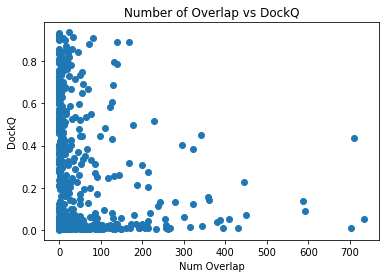

In [10]:
plt.scatter(df_multi2.NumOverlap,df_multi2.DockQ)
plt.xlabel("Num Overlap")
plt.ylabel("DockQ")
plt.title("Number of Overlap vs DockQ")

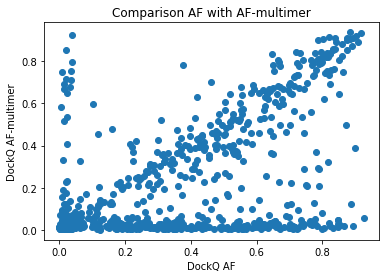

0.578029013264637

In [11]:
df_dockq=pd.merge(df2,df2_multi2,on="Name")
plt.scatter(df_dockq.DockQ_x,df_dockq.DockQ_y)
plt.xlabel("DockQ AF")
plt.ylabel("DockQ AF-multimer")
plt.title("Comparison AF with AF-multimer")
plt.show()
np.corrcoef(df_dockq.DockQ_x,df_dockq.DockQ_y)[1,0]


In [12]:
df_dockq[(df_dockq.DockQ_x>0.6)&(df_dockq.DockQ_y<0.1)]

Name  DockQ_x  DockQ_y
18   O14818-P49721    0.832    0.008
23   O15144-P61158    0.709    0.010
31   O15318-Q9BUI4    0.709    0.016
39   O15511-P59998    0.865    0.017
40   O15511-P61160    0.622    0.029
..             ...      ...      ...
770  Q7RTV0-Q15393    0.650    0.037
789  Q86WV5-Q9H668    0.664    0.014
793  Q8N5N7-Q8N983    0.614    0.004
805  Q8WUF5-P62136    0.698    0.007
815  Q92665-P82673    0.620    0.018

[65 rows x 3 columns]

In [21]:
df2_prok

Name          DockQ
0    O00148-Q13838          0.026
1    O00231-O00232  O00231-O00487
2    O00232-O00231  O00232-O00487
3    O00303-Q7L2H7          0.365
4    O00303-Q9Y262          0.011
..             ...            ...
594  Q92905-P61201  Q92905-Q9BT78
595  Q92905-Q9UBW8          0.074
596  Q92905-Q9UNS2          0.016
597  Q93050-P61421          0.003
598  Q96B26-Q06265  Q96B26-Q15024

[599 rows x 2 columns]

In [23]:
print(np.mean(df2.DockQ),len(df2[df2.DockQ>0.23])/len(df2))
print(np.mean(df2_multi.DockQ),len(df2_multi[df2_multi.DockQ>0.23])/len(df2_multi))
print(np.mean(df2_nopair.DockQ),len(df2_nopair[df2_nopair.DockQ>0.23])/len(df2_nopair))
print(np.mean(df2_prok.DockQ),len(df2_prok[df2_prok.DockQ>0.23])/len(df2_prok))

0.3208139931740614 0.5426621160409556
0.21569601677148847 0.35744234800838576
0.22292427616926505 0.36525612472160357
0.19774247491638794 0.3193979933110368


0.21569601677148847

0.5611520388082764

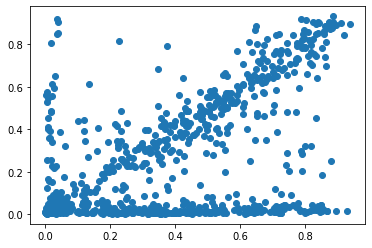

In [13]:
df_dockq=pd.merge(df2,df2_multi,on="Name")
plt.scatter(df_dockq.DockQ_x,df_dockq.DockQ_y)
np.corrcoef(df_dockq.DockQ_x,df_dockq.DockQ_y)[1,0]


In [14]:
Y=df.DockQ
X=df[["Mult","LOG","IF_plDDT"]]

In [15]:
reg = LinearRegression().fit(X,Y)
reg.coef_

array([ 0.00145921, -0.01447596,  0.00589487])

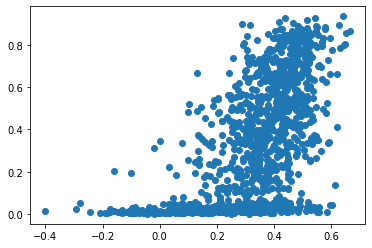

In [16]:
pred=reg.predict(X)
plt.scatter(pred,Y)

In [17]:
np.corrcoef(pred,Y)[0,1]

0.5917068254021535

In [14]:
Y=df["DockQ"].to_list()
X=df["Mult"].to_list()
Y

[0.032,
 0.124,
 0.51,
 0.562,
 0.12300000000000001,
 0.025,
 0.355,
 0.7390000000000001,
 0.737,
 0.386,
 0.48700000000000004,
 0.045,
 0.013000000000000001,
 0.58,
 0.009000000000000001,
 0.369,
 0.797,
 0.218,
 0.008,
 0.79,
 0.625,
 0.035,
 0.369,
 0.009000000000000001,
 0.67,
 0.013000000000000001,
 0.568,
 0.184,
 0.017,
 0.087,
 0.8320000000000001,
 0.053,
 0.371,
 0.643,
 0.305,
 0.7090000000000001,
 0.889,
 0.054000000000000006,
 0.8240000000000001,
 0.42200000000000004,
 0.31,
 0.755,
 0.022000000000000002,
 0.7090000000000001,
 0.054000000000000006,
 0.36700000000000005,
 0.34299999999999997,
 0.5579999999999999,
 0.013000000000000001,
 0.826,
 0.496,
 0.865,
 0.622,
 0.815,
 0.013000000000000001,
 0.226,
 0.011000000000000001,
 0.01,
 0.009000000000000001,
 0.006,
 0.003,
 0.013000000000000001,
 0.41200000000000003,
 0.008,
 0.175,
 0.005,
 0.764,
 0.517,
 0.6729999999999999,
 0.025,
 0.637,
 0.017,
 0.7090000000000001,
 0.297,
 0.7190000000000001,
 0.019,
 0.705,
 0.005,
 

In [27]:
#sigmoid function
# 1/(1+e-x) x=Y-

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

In [16]:
p0 = [max(Y), np.median(X),1,min(Y)] # this is a mandatory initial guess
sigmoid(1,p0[0],p0[1],p0[2],p0[3])

0.001

In [30]:
Y=df_marks["DockQ"].to_list()
X=df_marks["Mult"].to_list()
p0 = [max(Y), np.median(X),1,min(Y)] # this is a mandatory initial guess
sigmoid(1,p0[0],p0[1],p0[2],p0[3])

popt, pcov = curve_fit(sigmoid, X, Y,p0, method='dogbox')
pred=sigmoid(X,*popt)
np.corrcoef(pred,X)

array([[1.        , 0.89593173],
       [0.89593173, 1.        ]])

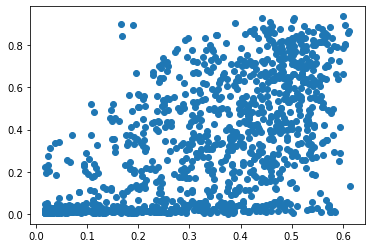

In [25]:
pred=sigmoid(X,*popt)
plt.scatter(pred,Y)

In [26]:
np.corrcoef(pred,Y)[0,1]

0.5928159377225124

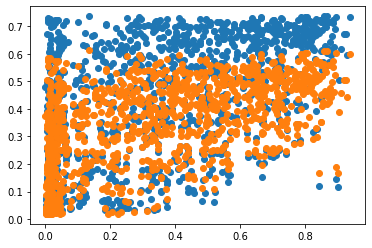

In [33]:
popt1=np.array([7.07140240e-01, 3.88062162e+02, 3.14767156e-02, 3.13182907e-02])
popt2=np.array([-6.13932499e-01,  3.87553637e+02, -1.82925395e-02,  6.32058555e-01])

pred1=sigmoid(X,*popt1)
pred2=sigmoid(X,*popt2)

plt.scatter(Y,pred1)
plt.scatter(Y,pred2)


#plt.scatter(pred1,pred2)


In [20]:
popt


array([-6.13932499e-01,  3.87553637e+02, -1.82925395e-02,  6.32058555e-01])

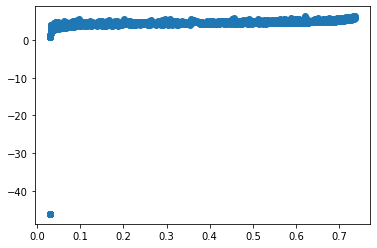

In [17]:
plt.scatter(pred,df.NumRes)

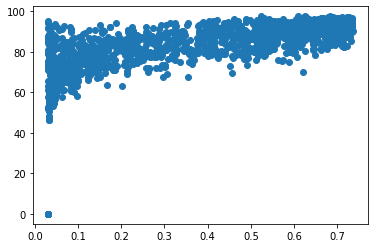

In [16]:
plt.scatter(pred,df.IF_plDDT)

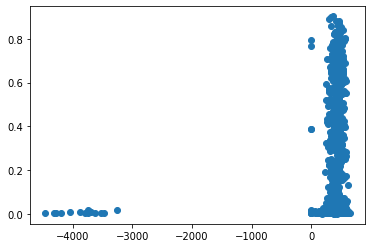

In [18]:
df_all=pd.read_csv("../data/evaluation.csv")
df_all["Mult"]=np.log(df_all.NumRes+1.e-20)*df.IF_plDDT
df_all["LOG"]=np.log(df_all.NumRes+1.e-20)
plt.scatter(df_all.Mult,df_all.DockQ)


In [20]:
X=df_all["Mult"].to_list()

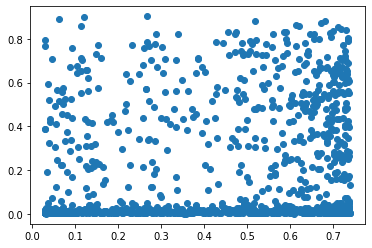

In [21]:
pred=sigmoid(X,*popt)
plt.scatter(pred,df_all.DockQ)

In [28]:
df_all["pred"]=pred

/home/arnee/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/arnee/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


(0.0, 1.0)

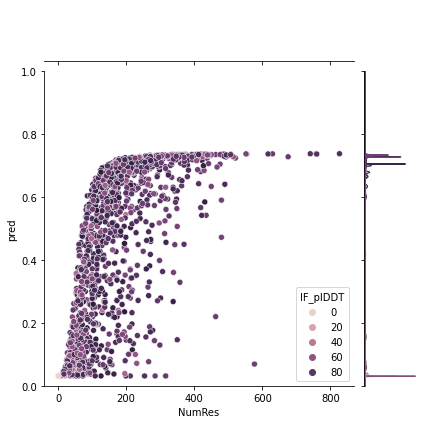

In [31]:
#f, ax = plt.subplots(figsize=(12., 12.))
sns.jointplot(data=df_all,x="NumRes",y="pred",hue="IF_plDDT")
plt.ylim([0,1])


In [5]:

df=pd.read_csv("../data/evaluation.csv")
df_negpLDDT=pd.read_csv("../data/negatome-pLDDT.csv")
df_negseqlen=pd.read_csv("../data/negatome-seqlen.csv",sep=",",names=["Name","SeqLen1","SeqLen2"])
df_negseqlen["SeqLen"]=df_negseqlen.SeqLen1+df_negseqlen.SeqLen2
df_negatome=pd.merge(df_negpLDDT,df_negseqlen,on=["Name"],how="inner")


In [6]:

df["Struct"]= np.where(df.DockQ.notna(), True, False)
df_struct=df[df.DockQ.notna()]
df_nostruct=df[df.DockQ.isna()]
#df_struct["Good"]= np.where(df_struct.DockQ>0.23, True, False)
#df_struct["TMGood"]= np.where(df_struct.MMall>0.7, True, False)
df_struct["GoodAll"]= np.where(df_struct.DockQ>0.23, True, False)
df_struct["TMGoodAll"]= np.where(df_struct.MMall>0.7, True, False)
df_corr=df_struct[df_struct.GoodAll==True]
df_incorr=df_struct[df_struct.GoodAll==False]



<ipython-input-6-e030fac814d9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_struct["GoodAll"]= np.where(df_struct.DockQ>0.23, True, False)
<ipython-input-6-e030fac814d9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_struct["TMGoodAll"]= np.where(df_struct.MMall>0.7, True, False)


In [9]:
minres=50
minIF=70

In [13]:
tempdf=df_struct[(df_struct.NumRes>minres)&(df_struct.IF_plDDT>minIF)]
G=nx.from_pandas_edgelist(tempdf,source="id1",target="id2",edge_attr="IF_plDDT")

In [14]:
net=Network(notebook=True,height='1200px', width='100%',)
net.from_nx(G)


In [16]:
#net_full.show_buttons(filter_=['physics'])
net.force_atlas_2based()
net.show("network.html")